<a href="https://colab.research.google.com/github/Vladimirsp81/hse_intrml/blob/master/HSE_DecisionTrees_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Обучите случайный лес, задав только гиперпараметр `n_estimators = 100`. Оцените важность признаков. Укажите название двух наиболее важных признаков.

In [0]:
from sklearn.datasets import load_wine
data = load_wine()

In [0]:
X_data = data['data'][0:130]
y_data = data['target'][0:130]

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
import seaborn as sns
import pandas as pd

In [0]:
feature_imp = pd.DataFrame({'importances' : clf.feature_importances_,
                            'name' : data.feature_names})

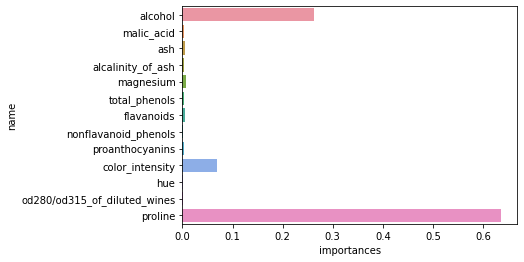

In [0]:
sns.barplot(x = 'importances', y= 'name', data=feature_imp)

In [0]:
clf.feature_importances_

array([2.61937303e-01, 4.05508234e-03, 4.85123426e-03, 2.58176491e-03,
       7.68125079e-03, 2.28507609e-03, 5.69957012e-03, 3.05164319e-04,
       2.78638847e-03, 6.79864951e-02, 1.12459026e-03, 2.06666841e-03,
       6.36639412e-01])

2. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Отмасштабируйте признаки, используя класс StandardScaler с гиперпараметрами по умолчанию. Обучите случайный лес, задав только гиперпараметр `n_estimators = 100`. Оцените важность признаков. Укажите название двух наиболее важных признаков.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data)

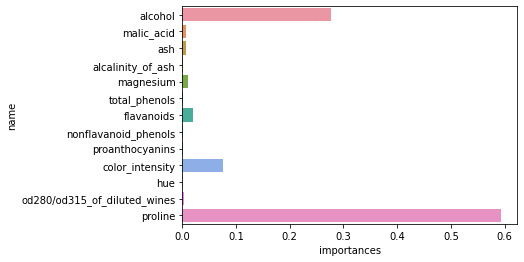

In [0]:
clf_scaler = RandomForestRegressor(n_estimators=100)
clf_scaler.fit(X_data, y_data)
feature_imp_scaler = pd.DataFrame({'importances' : clf_scaler.feature_importances_,
                            'name' : data.feature_names})
sns.barplot(x='importances', y='name', data=feature_imp_scaler)

In [0]:
clf_scaler.feature_importances_

array([0.27641401, 0.00711786, 0.00694217, 0.00124837, 0.01068345,
       0.00080467, 0.01881245, 0.00127459, 0.00151001, 0.07619008,
       0.00145423, 0.00351062, 0.59403749])

Ниже приведена неполная реализация класса Bagging который имеет методы `fit` для обучения бэггинга над `DecisionTreeRegressor` и метод `predict` для предсказания. Допишите необходимый код, чтобы реализовать бэггинг.

используемы переменные в коде:
- `self.n_estimators`, `n_estimators` - число используемых деревьев
- `self.regressors` - список объектов класса `DecisionTreeRegressor`, к которым уже был применён метод `fit`
Данный список необъодимо заполнить в методе `fit` и использовать для предсказания в методе `predict`
- `ind`-  выбранные индексы объектов при бутстрапе

при создании объекта класса `DecisionTreeRegressor` зафиксируйте  
`random_state=0`

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
class Bagging():
  def __init__(self, n_estimators=10):
    self.n_estimators = n_estimators
    self.regressors = []
  def fit(self, x_train, y_train):
    for i in range(self.n_estimators):
      np.random.seed(i)
      ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
      # your code here
      clf = DecisionTreeRegressor(random_state=0)
      clf.fit(x_train[ind], y_train[ind])
      self.regressors.append(clf)
  def predict(self, x_test):
    res = []
    for i in self.regressors:
      res.append(i.predict(x_test))
    res = np.array(res)
    return np.mean(res, axis=0) # your code here

Загрузите данные приложенные к заданию

In [3]:
import pandas as pd
from google.colab import files
uploder = files.upload()

Saving data.csv to data (2).csv


In [0]:
Data = pd.read_csv('data.csv', header=None)

Положим матрицу объекты-признаки в переменную `X`, а ответы в переменную `y`

In [0]:
X, y = Data.iloc[:, :100], Data.iloc[:, 100:]


Положим первые 6000 объектов в обучающую часть, остальные объекты в тестовую часть

In [0]:
x_train, y_train = np.array(X[:6000]), np.array(y[:6000])
x_test, y_test = np.array(X[6000:]), np.array(y[6000:])

3. Обучите бэггинг на 1 дереве. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [0]:
one_tree = Bagging(n_estimators=1)
one_tree.fit(x_train, y_train)

In [0]:
from sklearn.metrics import mean_squared_error

In [38]:
round((mean_squared_error(y_test, one_tree.predict(x_test)))/1000)

33.0

4. Обучите бэггинг на 5 деревьях. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [0]:
five_trees = Bagging(n_estimators=5)
five_trees.fit(x_train, y_train)

In [40]:
round((mean_squared_error(y_test, five_trees.predict(x_test)))/1000)

15.0

5. Обучите бэггинг на 100 деревьях. Оцените качество по метрике MSE на тестовой части. В ответе укажите целую часть.

In [0]:
hundred_trees = Bagging(n_estimators=100)
hundred_trees.fit(x_train, y_train)

In [42]:
round((mean_squared_error(y_test, hundred_trees.predict(x_test)))/1000)

11.0

6. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. В ответе укажите целую часть.

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
y_train = y_train.ravel()
print(y_train)

[ -37.19278053 -220.46412252 -325.38024932 ... -158.73018225   52.2339795
  139.81900028]


In [47]:
random_clf = RandomForestRegressor(n_estimators=1, random_state=0)
random_clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
round((mean_squared_error(y_test, random_clf.predict(x_test)))/1000)

35.0

8. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 5`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. В ответе укажите целую часть.

In [49]:
random_clf = RandomForestRegressor(n_estimators=5, random_state=0)
random_clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [50]:
round((mean_squared_error(y_test, random_clf.predict(x_test)))/1000)

15.0

9. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 100`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. В ответе укажите целую часть.

In [51]:
random_clf = RandomForestRegressor(n_estimators=100, random_state=0)
random_clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
round((mean_squared_error(y_test, random_clf.predict(x_test)))/1000)

11.0

10. Изучите документацию и разберитесь как посчитать Out-of-bag ошибку в RandomForestRegressor. Обучите RandomForestRegressor с гиперпараметром n_estimators=100 на обучающей части, зафиксируйте  
`random_state=0`. Найдите Out-of-bag ошибку алгоритма. Ответ округлите до сотых.

In [53]:
random_clf = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
random_clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
random_clf.oob_score_

0.7516660793764367